In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
#IMPORTING THE DATASET
dataset = pd.read_excel('DATA_CLUSTER.xlsx')

In [ ]:
print(dataset)

     sex \n  Ferritin    FSH    LH   TSH   MDA   Protein Carbonyl  Category \n
0         1      1598   2.69  0.56  4.06  10.13              1.69            1
1         1      1436   5.29  0.64  1.60   8.50              1.44            1
2         2      2245   1.06  1.66  7.27  12.37              1.47            1
3         1      3672   1.32  1.17  3.89  11.09              2.08            1
4         2      2368   1.96  1.21  2.94  11.69              2.07            1
..      ...       ...    ...   ...   ...    ...               ...          ...
100       1        24   8.40  9.30  6.30   5.00              0.96            0
101       1        37   7.30  5.10  1.90   1.86              0.88            0
102       1        94   6.80  8.80  4.20   1.77              0.82            0
103       1       125   8.10  7.50  3.00   3.91              0.90            0
104       2        75  12.80  9.70  9.40   3.46              0.91            0

[105 rows x 8 columns]


In [ ]:
#VALIDATION DATASET
dataset_validation=dataset.sample(frac=0.14, random_state=10)


In [ ]:
print(dataset_validation)

    sex \n  Ferritin    FSH     LH   TSH   MDA   Protein Carbonyl  Category \n
85       2        27   6.20  16.20  2.90   1.54              1.17            0
35       1      5694   0.02   0.19  8.42  16.86              2.34            1
48       1      1649   1.21   0.98  3.69  10.31              2.13            1
47       1      3439   0.94   0.79  4.17  13.97              2.28            1
82       2        96   6.90  10.90  1.90   2.95              1.00            0
42       2      3690   0.53   0.31  3.49  13.63              2.41            1
58       1       165  10.53   3.26  3.69   2.69              0.78            0
80       2         9  13.80  11.20  3.90   5.38              1.26            0
3        1      3672   1.32   1.17  3.89  11.09              2.08            1
41       2      3877   0.19   0.35  6.07  13.87              2.16            1
2        2      2245   1.06   1.66  7.27  12.37              1.47            1
26       2      2980   0.95   3.07  4.33  10.46     

In [ ]:
#TRAINING DATASET
np.random.seed(10)
remove_n = 15
drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
dataset_training = dataset.drop(drop_indices)

In [ ]:
print(dataset_training)

     sex \n  Ferritin    FSH    LH   TSH   MDA   Protein Carbonyl  Category \n
0         1      1598   2.69  0.56  4.06  10.13              1.69            1
1         1      1436   5.29  0.64  1.60   8.50              1.44            1
4         2      2368   1.96  1.21  2.94  11.69              2.07            1
5         2      2361   0.59  0.39  4.39  13.69              2.61            1
6         2      1700   5.27  1.06  3.63   9.20              1.63            1
..      ...       ...    ...   ...   ...    ...               ...          ...
100       1        24   8.40  9.30  6.30   5.00              0.96            0
101       1        37   7.30  5.10  1.90   1.86              0.88            0
102       1        94   6.80  8.80  4.20   1.77              0.82            0
103       1       125   8.10  7.50  3.00   3.91              0.90            0
104       2        75  12.80  9.70  9.40   3.46              0.91            0

[90 rows x 8 columns]


In [ ]:
X = dataset_training.iloc[:,1:7].values
y = dataset_training.iloc[:, -1].values

In [ ]:
print(X)

[[1.598e+03 2.690e+00 5.600e-01 4.060e+00 1.013e+01 1.690e+00]
 [1.436e+03 5.290e+00 6.400e-01 1.600e+00 8.500e+00 1.440e+00]
 [2.368e+03 1.960e+00 1.210e+00 2.940e+00 1.169e+01 2.070e+00]
 [2.361e+03 5.900e-01 3.900e-01 4.390e+00 1.369e+01 2.610e+00]
 [1.700e+03 5.270e+00 1.060e+00 3.630e+00 9.200e+00 1.630e+00]
 [6.214e+03 3.410e+00 3.300e-01 8.940e+00 1.435e+01 2.090e+00]
 [1.607e+03 7.680e+00 8.400e+00 7.200e-01 7.280e+00 1.630e+00]
 [2.629e+03 1.030e+00 1.500e+00 2.670e+00 1.305e+01 2.330e+00]
 [3.013e+03 7.700e-01 1.190e+00 4.270e+00 1.366e+01 2.060e+00]
 [4.934e+03 1.400e-01 5.200e-01 3.160e+00 1.577e+01 2.650e+00]
 [5.320e+03 1.000e-01 1.000e-01 6.910e+00 1.686e+01 2.110e+00]
 [3.546e+03 1.670e+00 5.100e-01 4.510e+00 1.532e+01 2.430e+00]
 [6.318e+03 3.900e-01 8.000e-02 9.330e+00 1.755e+01 2.620e+00]
 [4.420e+03 3.400e-01 1.950e+00 4.390e+00 1.241e+01 2.430e+00]
 [1.744e+03 4.550e+00 1.260e+00 4.020e+00 9.700e+00 2.280e+00]
 [3.832e+03 4.720e+00 1.250e+00 4.280e+00 1.110e+01 2.0

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-7.76322910e-01  2.49410976e+00  1.81081789e+00  1.13691756e+00
  -3.58323686e-01 -8.80779951e-01]
 [ 7.75373643e-01 -1.12728544e+00 -9.99062948e-01  5.42367412e-01
   1.21797447e+00  1.48738807e+00]
 [ 6.84065965e-01 -1.33851229e+00 -9.92804862e-01 -8.76559000e-01
   1.14460953e+00  6.92360233e-01]
 [ 2.24857763e-02  6.05792656e-01  6.84362321e-01 -1.60101087e+00
  -9.63060411e-02  3.03304059e-01]
 [-7.77390836e-01  1.29800593e+00  3.08877131e-01 -7.61645946e-01
  -1.42525954e+00 -1.53414059e-01]
 [-7.89138023e-01 -4.57021941e-02 -1.62565386e-01 -1.32621878e+00
  -5.99379920e-01 -1.06685029e+00]
 [-8.00885209e-01  1.27255692e+00  7.67803474e-01 -1.21130572e+00
  -9.91358317e-01 -6.77794120e-01]
 [-8.12632396e-01  3.90653024e+00  2.72632380e-02 -2.52031530e-01
  -5.74226226e-01 -1.06685029e+00]
 [-7.93943690e-01  8.65372636e-01  1.76909731e+00  9.37068773e-01
  -9.64108482e-01 -9.14610922e-01]
 [-8.14768248e-01  6.36331477e-01  1.56049443e+00  1.13691756e+00
  -1.20516472e+00 -9.8227

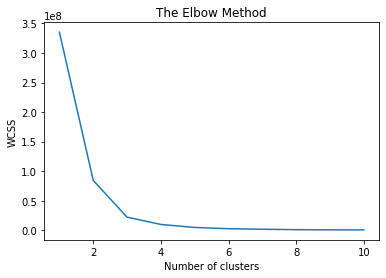

In [ ]:
#ELBOW METHOD TO FIND OPTIMUM VALUE OF K
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#TRAINING THE KMEANS MODEL ON THE TRAINING SET
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[0 0 0 0 0 3 0 0 0 2 3 2 3 2 0 2 3 0 0 2 0 0 0 2 0 2 0 0 2 3 2 3 0 3 0 0 2
 2 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#COUNTING THE NUMBER OF PATIENTS WITH NO DISEASE
no_disease=0
for i in y_kmeans:
    if i==1:
        no_disease+=1
print(no_disease)

45


In [ ]:
#COUNTING THE NUMBER OF PATIENTS IN EACH SEVERITY LEVEL OF HAVING DISEASE
dis_severity=[]
cluster_1=0
cluster_2=0
cluster_3=0
for i in y_kmeans:
    if i!=1:
        if i==0:
            cluster_1+=1
        elif i==2:
            cluster_2+=1
        else:
            cluster_3+=1
print("Cluster 0:",cluster_1)
print("Cluster 1:",no_disease)
print("Cluster 2:",cluster_2)
print("Cluster 3:",cluster_3)

Cluster 0: 26
Cluster 1: 45
Cluster 2: 12
Cluster 3: 7


In [ ]:
#CLUSTER 1: NOT HAVING DISEASE: 45
#CLUSTER 0: HAVING  MILD DISEASE: 26
#CLUSTER 2: HAVING MODERATE DISEASE: 12
#CLUSTER 3: HAVING SEVERE DISEASE: 7

In [ ]:
#APPENDING THE CLUSTER LABELS TO THE ORIGINAL DATA
dataset_training = dataset_training.copy()
dataset_training['Cluster'] = y_kmeans
display(dataset_training.sort_values(by='Cluster'))

,sex \n,Ferritin,FSH,LH,TSH,MDA,Protein Carbonyl,Category \n,Cluster
0,1,1598,2.69,0.56,4.06,10.13,1.69,1,0
23,2,1840,2.38,1.00,5.30,9.20,1.92,1,0
24,2,2313,1.37,0.59,3.54,11.03,1.72,1,0
25,2,2846,0.04,0.36,2.17,13.20,1.86,1,0
28,2,1689,3.93,3.81,3.95,7.32,1.75,1,0
...,...,...,...,...,...,...,...,...,...
38,1,5800,0.32,0.39,5.40,15.35,2.30,1,3
7,2,6214,3.41,0.33,8.94,14.35,2.09,1,3
15,1,6318,0.39,0.08,9.33,17.55,2.62,1,3
19,2,6041,0.21,0.40,5.17,13.74,2.20,1,3


In [ ]:
#XG BOOST

In [ ]:
X2 = dataset_training.iloc[:,1:7].values
y2 = dataset_training.iloc[:, -1].values

In [ ]:
print(y2)

[0 0 0 0 0 3 0 0 0 2 3 2 3 2 0 2 3 0 0 2 0 0 0 2 0 2 0 0 2 3 2 3 0 3 0 0 2
 2 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [ ]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#TRAINING xg BOOST ON  TRAINING SET
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [3 3]
 [0 0]
 [1 1]]


In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[6 0 0 0]
 [0 7 0 0]
 [0 0 3 0]
 [0 0 0 2]]


1.0

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X2_train, y = y2_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [ ]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[1567,2.69,0.56,4.06,10.13,1.69]])))

[0]


In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ann.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[6 0 0 0]
 [0 7 0 0]
 [0 0 3 0]
 [0 0 0 2]]


1.0

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X2_train, y = y2_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [ ]:
#ANN REGRESSION

In [ ]:
#INITIALIZING THE ANN
ann = tf.keras.models.Sequential()

In [ ]:
#ADDING THE INPUT LAYER AND THE FIRST HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#ADDING THE SECOND LAYER
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [ ]:
#ADDING THE OUTPUT LAYER
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
#TRAINING ANN MODEL


In [ ]:
#COMPILING THE ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.0272
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.8187
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7165
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4979
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4307
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 1.2497
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0571
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9826
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8748
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7802
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6759
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6266
Epoch 13/100
3/3 [==============================] - 0s 4ms/st

In [ ]:
y_pred = ann.predict(X2_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y2_test),1)),1))

[[ 5.12e+01  1.00e+00]
 [ 9.29e+01  1.00e+00]
 [-1.16e+00  0.00e+00]
 [ 3.84e+01  1.00e+00]
 [ 9.93e-01  0.00e+00]
 [ 1.00e+02  1.00e+00]
 [ 1.52e+00  0.00e+00]
 [ 8.69e+01  1.00e+00]
 [ 1.89e+00  0.00e+00]
 [-1.73e+00  0.00e+00]
 [ 5.68e+01  1.00e+00]
 [ 5.97e+01  1.00e+00]
 [ 1.22e+02  1.00e+00]
 [-3.27e-01  0.00e+00]
 [ 6.45e+01  1.00e+00]
 [ 1.27e+02  1.00e+00]
 [ 3.53e+01  1.00e+00]
 [-5.72e-02  0.00e+00]]
